Lập trình Python cho Máy học - CS116.Q11

ĐỒ ÁN: Tiền xử lý dữ liệu

In [11]:
# Import thư viện cần thiết
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
import re


CHỌN ĐƯỜNG DẪN

In [12]:
# Đường dẫn thư mục chứa các file parquet
base_path = Path(r"D:\recommendation dataset")

ĐỌC DỮ LIỆU SƯƠNG SƯƠNG

In [13]:
# Tắt cảnh báo không cần thiết
warnings.filterwarnings('ignore')

# Cài đặt style cho biểu đồ
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Tìm tất cả file parquet trong thư mục
all_parquet_files = list(base_path.glob("*.parquet"))
print(f"Tìm thấy {len(all_parquet_files)} file parquet trong thư mục.")

# Phân loại file theo tên
sales_item_files = []
sales_purchase_files = []
sales_user_files = []

for file_path in all_parquet_files:
    name = file_path.name.lower()
    
    if "sales_pers.item" in name:
        sales_item_files.append(file_path)
    elif "sales_pers.purchase" in name or "sales_pers.purchase_history_daily" in name:
        sales_purchase_files.append(file_path)
    elif "sales_pers.user" in name:
        sales_user_files.append(file_path)

# In kết quả phân loại
print(f"""
 Tổng kết:
   sales_pers.item: {len(sales_item_files)} files
   sales_pers.purchase: {len(sales_purchase_files)} files
   sales_pers.user: {len(sales_user_files)} files
""")

# Hàm đọc nhóm file parquet
def read_parquet_group(file_list, group_name):
    if not file_list:
        print(f"Không có file nào cho nhóm {group_name}")
        return None
    
    print(f"Đang đọc {len(file_list)} file(s) cho nhóm {group_name}...")
    
    df = pl.read_parquet(file_list)
    
    print(f"{group_name} loaded: {df.shape[0]:,} rows × {df.shape[1]} columns")
    return df

# Đọc dữ liệu từ các nhóm file
sales_item_df = read_parquet_group(sales_item_files, "SALES ITEM")
sales_purchase_df = read_parquet_group(sales_purchase_files, "SALES PURCHASE")
sales_user_df = read_parquet_group(sales_user_files, "SALES USER")

# Tổng kết dữ liệu đã đọc
print("\nTỔNG KẾT DỮ LIỆU:")
if sales_item_df is not None:
    print(f"sales_item_df: {sales_item_df.shape}")
if sales_purchase_df is not None:
    print(f"sales_purchase_df: {sales_purchase_df.shape}")
if sales_user_df is not None:
    print(f"sales_user_df: {sales_user_df.shape}")

Tìm thấy 83 file parquet trong thư mục.

 Tổng kết:
   sales_pers.item: 1 files
   sales_pers.purchase: 72 files
   sales_pers.user: 10 files

Đang đọc 1 file(s) cho nhóm SALES ITEM...
SALES ITEM loaded: 27,332 rows × 34 columns
Đang đọc 72 file(s) cho nhóm SALES PURCHASE...
SALES PURCHASE loaded: 35,729,825 rows × 16 columns
Đang đọc 10 file(s) cho nhóm SALES USER...
SALES USER loaded: 4,573,964 rows × 18 columns

TỔNG KẾT DỮ LIỆU:
sales_item_df: (27332, 34)
sales_purchase_df: (35729825, 16)
sales_user_df: (4573964, 18)


In [65]:
# Tạo dictionary chứa các DataFrame
datasets = {
    "SALES ITEM": sales_item_df,
    "SALES PURCHASE": sales_purchase_df,
    "SALES USER": sales_user_df
}

In [64]:
# Thống kê tất cả các cột trong từng bảng
# Tháo docstring (""") ra để chạy thử, nhưng khá lâu!
# Khỏi chạy nếu không cần thiết!


for name, df in datasets.items():
    if df is None:
        continue

    print(f"\n[ {name} ]")
    print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
    print("Columns:", df.columns)

    print("\nThống kê tất cả các cột:")
    for col in df.columns:
        try:
            # Ép kiểu về chuỗi để thống kê phổ biến
            col_str = df[col].cast(pl.Utf8).drop_nulls()
            unique_count = col_str.n_unique()
            most_common = col_str.value_counts().sort("count", descending=True).head(1)

            if most_common.shape[0] > 0:
                most_common_val = most_common[0, col]
                most_common_freq = most_common[0, "count"]
                print(f" - {col}: {unique_count} giá trị duy nhất, phổ biến nhất: '{most_common_val}' ({most_common_freq} lần)")
            else:
                print(f" - {col}: {unique_count} giá trị duy nhất, không có giá trị phổ biến")

        except Exception as e:
            print(f"Lỗi khi thống kê cột '{col}': {e}")



[ SALES ITEM ]
Shape: 27,332 rows × 34 columns
Columns: ['p_id', 'item_id', 'price', 'category_l1_id', 'category_l1', 'category_l2_id', 'category_l2', 'category_l3_id', 'category_l3', 'category_id', 'category', 'description', 'brand', 'manufacturer', 'creation_timestamp', 'is_deleted', 'created_date', 'updated_date', 'sync_status_id', 'last_sync_date', 'sync_error_message', 'image_url', 'gender_target', 'age_group', 'item_type', 'gp', 'weight', 'color', 'size', 'origin', 'volume', 'material', 'sale_status', 'description_new']

Thống kê tất cả các cột:
 - p_id: 27332 giá trị duy nhất, phổ biến nhất: '117789' (1 lần)
 - item_id: 27332 giá trị duy nhất, phổ biến nhất: '3514000000028' (1 lần)
 - price: 733 giá trị duy nhất, phổ biến nhất: '49000.0000' (3715 lần)
 - category_l1_id: 15 giá trị duy nhất, phổ biến nhất: '3292' (15042 lần)
 - category_l1: 15 giá trị duy nhất, phổ biến nhất: 'Thời trang' (15042 lần)
 - category_l2_id: 139 giá trị duy nhất, phổ biến nhất: '3958' (7328 lần)
 - ca

TASK 1: Loại bỏ các cột không cần thiết. 

In [62]:
# Danh sách các cột cần loại bỏ
cols_to_drop = [
    # SALES ITEM
    "is_deleted",
    "last_sync_date",
    "sync_error_message",
    "image_url",
    "description_new",
    "weight",
    "sync_status_id",
    "p_id",
    "item_id",
    "category_l1_id",
    "category_l2_id",
    "category_l3_id",
    "category_id",
    "description",
    "manufacturer",

    # SALES PURCHASE
    "is_deleted",
    "event_type",
    "user_id",
    "item_id",
    "customer_id",

    # SALES USER
    "is_deleted",
    "sync_status_id",
    "last_sync_date",
    "sync_error_message",
    "customer_id",
    "user_id"
]

# Lặp qua từng DataFrame trong datasets
for name, df in datasets.items():
    if df is None:
        continue

    print(f"\n[ {name} ]")
    existing_cols = [c for c in cols_to_drop if c in df.columns]

    if existing_cols:
        print(f" - Các cột sẽ bị loại bỏ: {existing_cols}")
        df = df.drop(existing_cols)
        datasets[name] = df  # Cập nhật lại DataFrame sau khi loại bỏ
    else:
        print(" - Không có cột nào trong danh sách cần loại bỏ.")

    print(f" - Kích thước mới: {df.shape[0]:,} rows × {df.shape[1]} columns")



[ SALES ITEM ]
 - Các cột sẽ bị loại bỏ: ['is_deleted', 'last_sync_date', 'sync_error_message', 'image_url', 'description_new', 'weight', 'sync_status_id', 'p_id', 'item_id', 'category_l1_id', 'category_l2_id', 'category_l3_id', 'category_id', 'description', 'manufacturer', 'is_deleted', 'item_id', 'is_deleted', 'sync_status_id', 'last_sync_date', 'sync_error_message']
 - Kích thước mới: 27,332 rows × 19 columns

[ SALES PURCHASE ]
 - Các cột sẽ bị loại bỏ: ['is_deleted', 'item_id', 'is_deleted', 'event_type', 'user_id', 'item_id', 'customer_id', 'is_deleted', 'customer_id', 'user_id']
 - Kích thước mới: 35,729,825 rows × 11 columns

[ SALES USER ]
 - Các cột sẽ bị loại bỏ: ['is_deleted', 'last_sync_date', 'sync_error_message', 'sync_status_id', 'is_deleted', 'user_id', 'customer_id', 'is_deleted', 'sync_status_id', 'last_sync_date', 'sync_error_message', 'customer_id', 'user_id']
 - Kích thước mới: 4,573,964 rows × 12 columns


TASK 2.1: Xử lý NULL

In [7]:
# Trong lúc xóa các cột thì các giá trị null đã bị loại bỏ rồi!

TASK 2.2: Xử lý Outlier

__Lưu ý__: Mỗi lần chạy code dưới là chạy lại dictionary datasets nha!

In [66]:
def plot_outlier_boxplot_horizontal(df_before, df_after, column, outlier_mask, title):
    """
    Vẽ boxplot ngang so sánh trước và sau khi xử lý outlier
    Giá trị nằm ở trục X
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    
    data_before = df_before[column].to_numpy()
    data_after = df_after[column].to_numpy()
    
    # SUBPLOT 1: Boxplot ngang trước xử lý
    normal_data = data_before[~outlier_mask]
    outlier_data = data_before[outlier_mask]
    
    boxplot1 = ax1.boxplot([normal_data], patch_artist=True, vert=False, positions=[1], widths=0.6)
    boxplot1['boxes'][0].set_facecolor('lightblue')
    
    # Hiển thị outliers màu đỏ
    if len(outlier_data) > 0:
        x_outliers = outlier_data
        y_outliers = np.random.normal(1, 0.05, size=len(outlier_data))
        ax1.scatter(x_outliers, y_outliers, color='red', alpha=0.7, s=30, label=f'Outliers ({len(outlier_data)})')
    
    ax1.set_title(f'Boxplot - {column}\nTrước khi xử lý', fontweight='bold')
    ax1.set_xlabel('Giá trị')
    ax1.set_yticks([1])
    ax1.set_yticklabels(['Normal Data'])
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # SUBPLOT 2: Boxplot ngang sau xử lý
    boxplot2 = ax2.boxplot([data_after], patch_artist=True, vert=False, positions=[1], widths=0.6)
    boxplot2['boxes'][0].set_facecolor('lightgreen')
    ax2.set_title(f'Boxplot - {column}\nSau khi xử lý', fontweight='bold')
    ax2.set_xlabel('Giá trị')
    ax2.set_yticks([1])
    ax2.set_yticklabels(['Processed Data'])
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# HÀM VẼ BOXPLOT NGANG KẾT HỢP
def plot_outlier_boxplot_combined_horizontal(df_before, df_after, column, outlier_mask, title):
    """
    Vẽ boxplot ngang kết hợp trước và sau trên cùng 1 biểu đồ
    """
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    
    data_before = df_before[column].to_numpy()
    data_after = df_after[column].to_numpy()
    
    normal_data = data_before[~outlier_mask]
    outlier_data = data_before[outlier_mask]
    
    # Vẽ 2 boxplot ngang cạnh nhau
    boxplots = ax.boxplot([normal_data, data_after], 
                         patch_artist=True, 
                         vert=False, 
                         positions=[2, 1], 
                         widths=0.6)
    
    # Tô màu cho boxplot
    colors = ['lightblue', 'lightgreen']
    for patch, color in zip(boxplots['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    # Hiển thị outliers màu đỏ (chỉ cho dữ liệu trước xử lý)
    if len(outlier_data) > 0:
        x_outliers = outlier_data
        y_outliers = np.random.normal(2, 0.05, size=len(outlier_data))
        ax.scatter(x_outliers, y_outliers, color='red', alpha=0.7, s=30, 
                  label=f'Outliers ({len(outlier_data)})')
    
    ax.set_title(f'Boxplot - {column}\nSo sánh trước và sau xử lý', fontweight='bold', fontsize=12)
    ax.set_xlabel('Giá trị', fontsize=10)
    ax.set_yticks([1, 2])
    ax.set_yticklabels(['Sau xử lý', 'Trước xử lý'], fontsize=10)
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Thêm thống kê
    outlier_count = len(outlier_data)
    total_count = len(data_before)
    stats_text = f'Outliers: {outlier_count}/{total_count} ({outlier_count/total_count*100:.1f}%)'
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

# HÀM VẼ KẾT HỢP SCATTER + BOXPLOT NGANG
def plot_outlier_combined_horizontal(df_before, df_after, column, outlier_mask, title):
    """
    Vẽ kết hợp scatter plot và boxplot ngang
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    data_before = df_before[column].to_numpy()
    data_after = df_after[column].to_numpy()
    indices = np.arange(len(data_before))
    
    # SCATTER PLOT
    normal_indices = indices[~outlier_mask]
    outlier_indices = indices[outlier_mask]
    
    ax1.scatter(normal_indices, data_before[~outlier_mask], alpha=0.5, color='blue', label='Normal', s=8)
    ax1.scatter(outlier_indices, data_before[outlier_mask], alpha=0.8, color='red', label='Outliers', s=15)
    ax1.set_title(f'Scatter Plot - {column}', fontweight='bold')
    ax1.set_xlabel('Index')
    ax1.set_ylabel('Giá trị')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # BOXPLOT NGANG KẾT HỢP
    normal_data = data_before[~outlier_mask]
    outlier_data = data_before[outlier_mask]
    
    boxplots = ax2.boxplot([normal_data, data_after], 
                          patch_artist=True, 
                          vert=False, 
                          positions=[2, 1], 
                          widths=0.6)
    
    colors = ['lightblue', 'lightgreen']
    for patch, color in zip(boxplots['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    # Hiển thị outliers
    if len(outlier_data) > 0:
        x_outliers = outlier_data
        y_outliers = np.random.normal(2, 0.05, size=len(outlier_data))
        ax2.scatter(x_outliers, y_outliers, color='red', alpha=0.7, s=30, 
                   label=f'Outliers ({len(outlier_data)})')
    
    ax2.set_title(f'Boxplot - {column}\nSo sánh trước và sau xử lý', fontweight='bold')
    ax2.set_xlabel('Giá trị')
    ax2.set_yticks([1, 2])
    ax2.set_yticklabels(['Sau xử lý', 'Trước xử lý'])
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

In [68]:
# XÁC ĐỊNH OUTLIER BẰNG PHƯƠNG PHÁP IQR
def get_iqr_outlier_mask(df, col):
    """
    Xác định outlier sử dụng phương pháp IQR
    """
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    if Q1 is None or Q3 is None:
        return np.zeros(df.shape[0], dtype=bool)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    col_data = df[col].to_numpy()
    return (col_data < lower_bound) | (col_data > upper_bound)

In [69]:
# ĐỊNH NGHĨA CÁC KIỂU DỮ LIỆU SỐ
NUMERIC_DTYPES = {
    pl.Int8, pl.Int16, pl.Int32, pl.Int64,
    pl.UInt8, pl.UInt16, pl.UInt32, pl.UInt64,
    pl.Float32, pl.Float64
}

# XỬ LÝ OUTLIER BẰNG WINSORIZING
def handle_outliers_with_winsorizing(df):
    """
    Xử lý outlier bằng Winsorizing
    """
    numeric_cols = [col for col, dtype in zip(df.columns, df.dtypes) if dtype in NUMERIC_DTYPES]
    
    # Lọc ra chỉ các cột CONTINUOUS
    continuous_cols = []
    for col in numeric_cols:
        unique_count = df[col].n_unique()
        total_count = df.shape[0]
        unique_ratio = unique_count / total_count
        
        if unique_ratio >= 0.05 and unique_count > 10:
            continuous_cols.append(col)
        else:
            print(f"   ⏩ Bỏ qua cột categorical: {col} (unique: {unique_count})")
    
    df_processed = df.clone()
    outlier_masks = {}
    
    for col in continuous_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        
        if Q1 is None or Q3 is None:
            outlier_masks[col] = np.zeros(df.shape[0], dtype=bool)
            continue
            
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        col_data = df[col].to_numpy()
        outlier_mask = (col_data < lower_bound) | (col_data > upper_bound)
        outlier_masks[col] = outlier_mask
        
        if outlier_mask.any():
            winsorized_data = col_data.copy()
            winsorized_data[winsorized_data < lower_bound] = lower_bound
            winsorized_data[winsorized_data > upper_bound] = upper_bound
            df_processed = df_processed.with_columns(pl.Series(col, winsorized_data))
    
    return df_processed, outlier_masks, continuous_cols


XỬ LÝ OUTLIER

🎯 ĐANG XỬ LÝ: SALES ITEM
----------------------------------------
   ⏩ Bỏ qua cột categorical: category_l1_id (unique: 15)
   ⏩ Bỏ qua cột categorical: category_l2_id (unique: 139)
   ⏩ Bỏ qua cột categorical: category_l3_id (unique: 523)
   ⏩ Bỏ qua cột categorical: sync_status_id (unique: 2)
   ⏩ Bỏ qua cột categorical: weight (unique: 1)
   ⏩ Bỏ qua cột categorical: sale_status (unique: 2)
📊 Kích thước: 27,332 hàng × 34 cột
🔢 Cột continuous: 3
   🔴 p_id: 102 outliers (0.4%)
   🔴 creation_timestamp: 304 outliers (1.1%)
📈 Tổng outliers: 406
📉 Vẽ boxplot_combined cho 2 cột có outlier...


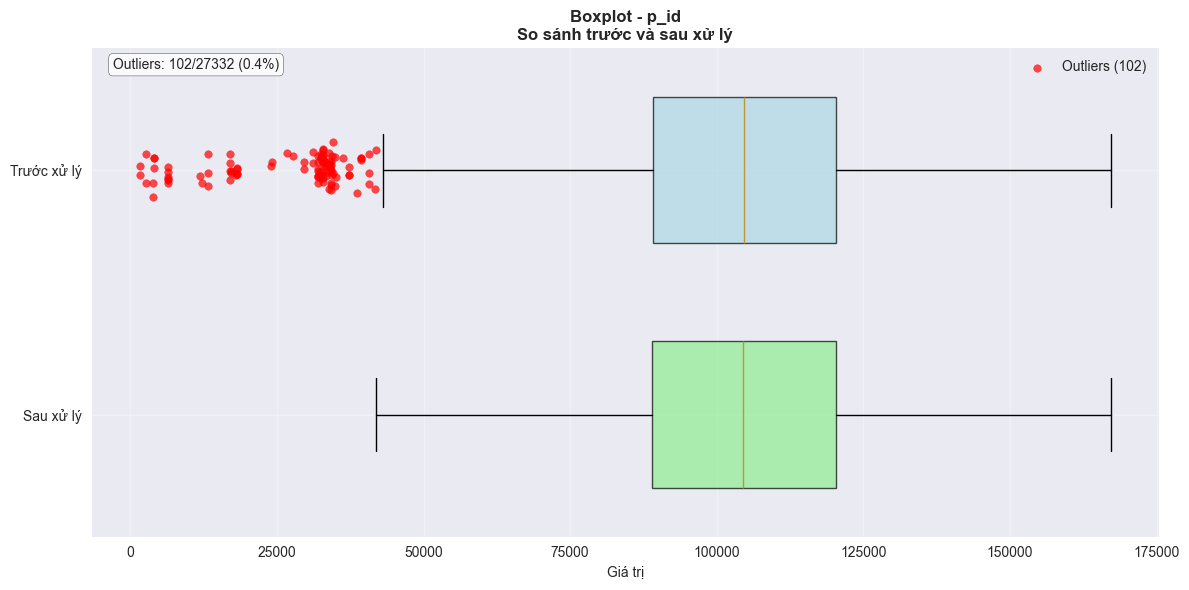

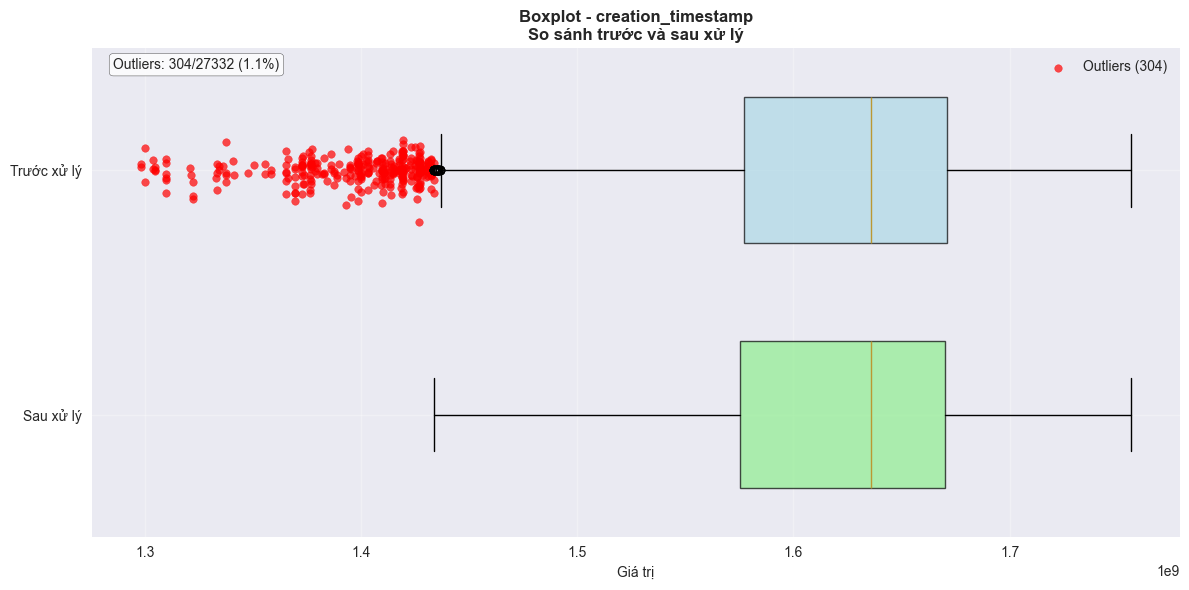


🎯 ĐANG XỬ LÝ: SALES PURCHASE
----------------------------------------
   ⏩ Bỏ qua cột categorical: date_key (unique: 366)
   ⏩ Bỏ qua cột categorical: quantity (unique: 90)
   ⏩ Bỏ qua cột categorical: location (unique: 765)
📊 Kích thước: 35,729,825 hàng × 16 cột
🔢 Cột continuous: 2
📈 Tổng outliers: 0
✅ Không tìm thấy outlier trong các cột continuous.

🎯 ĐANG XỬ LÝ: SALES USER
----------------------------------------
   ⏩ Bỏ qua cột categorical: location (unique: 995)
   ⏩ Bỏ qua cột categorical: sync_status_id (unique: 2)
   ⏩ Bỏ qua cột categorical: install_date (unique: 4919)
📊 Kích thước: 4,573,964 hàng × 18 cột
🔢 Cột continuous: 2
   🔴 timestamp: 177747 outliers (3.9%)
📈 Tổng outliers: 177747
📉 Vẽ boxplot_combined cho 1 cột có outlier...


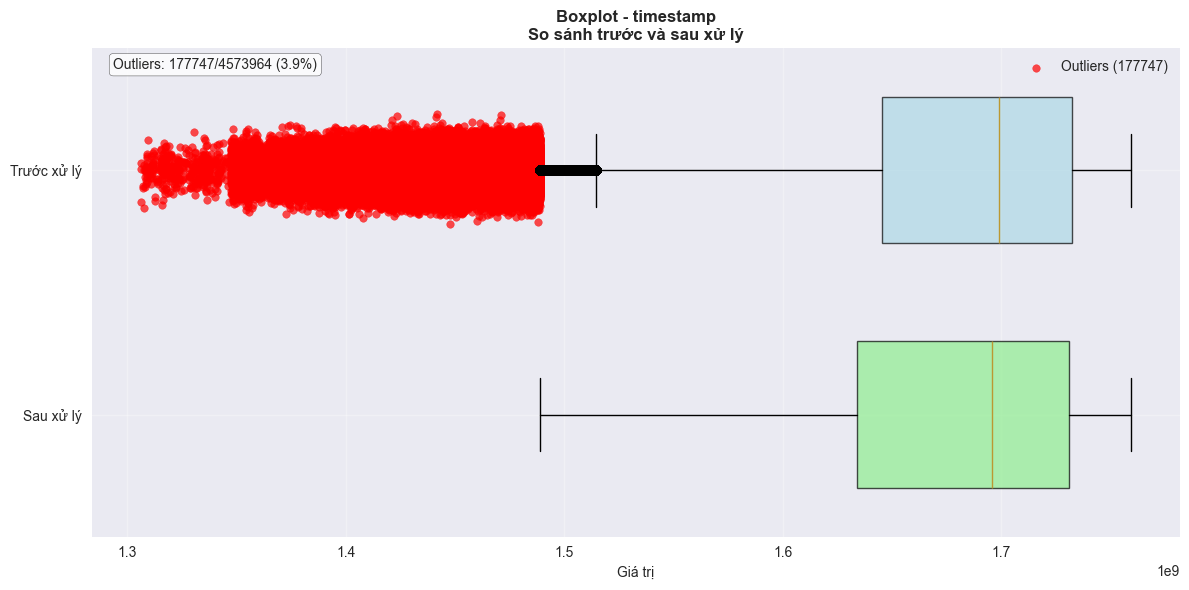


HOÀN TẤT XỬ LÝ OUTLIER!


In [70]:
# XỬ LÝ OUTLIER CHO TẤT CẢ DATASETS
print("=" * 60)
print("XỬ LÝ OUTLIER")
print("=" * 60)

# CHỌN KIỂU VẼ: "boxplot_horizontal", "combined_horizontal", hoặc "boxplot_combined"
plot_style = "boxplot_combined"  # Thay đổi theo ý muốn

for name, df in datasets.items():
    if df is None:
        continue
    
    print(f"\n🎯 ĐANG XỬ LÝ: {name}")
    print("-" * 40)
    
    numeric_cols = [col for col, dtype in zip(df.columns, df.dtypes) if dtype in NUMERIC_DTYPES]
    if not numeric_cols:
        print("❌ Không có cột số để xử lý outlier.")
        continue

    df_before = df.clone()
    df_after, outlier_masks, continuous_cols = handle_outliers_with_winsorizing(df)
    datasets[name] = df_after

    print(f"📊 Kích thước: {df_before.shape[0]:,} hàng × {df_before.shape[1]} cột")
    print(f"🔢 Cột continuous: {len(continuous_cols)}")
    
    total_outliers = 0
    cols_with_outliers = []
    
    for col in continuous_cols:
        outlier_count = outlier_masks[col].sum()
        total_outliers += outlier_count
        if outlier_count > 0:
            cols_with_outliers.append(col)
            percentage = (outlier_count / len(df_before)) * 100
            print(f"   🔴 {col}: {outlier_count} outliers ({percentage:.1f}%)")
    
    print(f"📈 Tổng outliers: {total_outliers}")
    
    # Vẽ biểu đồ
    if cols_with_outliers:
        print(f"📉 Vẽ {plot_style} cho {len(cols_with_outliers)} cột có outlier...")
        for col in cols_with_outliers:
            outlier_mask = outlier_masks[col]
            
            if plot_style == "boxplot_horizontal":
                plot_outlier_boxplot_horizontal(df_before, df_after, col, outlier_mask, name)
            elif plot_style == "combined_horizontal":
                plot_outlier_combined_horizontal(df_before, df_after, col, outlier_mask, name)
            elif plot_style == "boxplot_combined":
                plot_outlier_boxplot_combined_horizontal(df_before, df_after, col, outlier_mask, name)
                
    else:
        print("✅ Không tìm thấy outlier trong các cột continuous.")

print("\n" + "=" * 60)
print("HOÀN TẤT XỬ LÝ OUTLIER!")
print("=" * 60)

TASK 3:

In [8]:
for name, df in datasets.items():
    if df is None:
        continue
    num_cols = [col for col, dtype in zip(df.columns, df.dtypes) if dtype in pl.NUMERIC_DTYPES]
    if len(num_cols) < 2:
        print(f"[{name}] Không đủ cột số để tính tương quan.")
        continue

    # Lấy mẫu nhỏ
    max_sample = 15000000
    df_sample = df.select(num_cols)
    if df_sample.height > max_sample:
        df_sample = df_sample.sample(n=max_sample, seed=42)
    # Tính corr matrix và chuyển sang pandas df
    corr_matrix = df_sample.to_pandas().corr().abs()

    # Lấy các cặp có tương quan cao > 0.85
    mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    high_corr_pairs = (
        corr_matrix.where(mask)
        .stack()
        .reset_index()
        .rename(columns={0: "correlation", "level_0": "feature_1", "level_1": "feature_2"})
        .query("correlation > 0.85")
    )

    print(f"\n[ {name} ] Các cặp biến có tương quan cao (> 0.85):")
    if not high_corr_pairs.empty:
        print(high_corr_pairs, "\n")
    else:
        print("Không có cặp nào quá tương đồng.\n")


[ SALES ITEM ] Các cặp biến có tương quan cao (> 0.85):
  feature_1 feature_2  correlation
1     price        gp     0.886709 


[ SALES PURCHASE ] Các cặp biến có tương quan cao (> 0.85):
     feature_1 feature_2  correlation
2    timestamp  date_key     0.998297
8  event_value  quantity     1.000000 


[ SALES USER ] Các cặp biến có tương quan cao (> 0.85):
Không có cặp nào quá tương đồng.



In [9]:
reduced_datasets = {}

for name, df in datasets.items():
    if df is None:
        continue

    num_cols = [col for col, dtype in zip(df.columns, df.dtypes) if dtype in pl.NUMERIC_DTYPES]
    if len(num_cols) < 2:
        continue

    # Lấy mẫu
    max_sample = 15000000
    df_sample = df.select(num_cols)
    if df_sample.height > max_sample:
        df_sample = df_sample.sample(n=max_sample, seed=42)

    corr_matrix = df_sample.to_pandas().corr().abs()
    mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    high_corr_pairs = (
        corr_matrix.where(mask)
        .stack()
        .reset_index()
        .rename(columns={0: "correlation", "level_0": "feature_1", "level_1": "feature_2"})
        .query("correlation > 0.85")
    )

    # Nếu có cặp tương quan cao, bỏ cột
    if not high_corr_pairs.empty:
        to_drop = set()
        for _, row in high_corr_pairs.iterrows():
            f1, f2 = row["feature_1"], row["feature_2"]
            if f2 not in to_drop:
                to_drop.add(f2)

        print(f"\n[ {name} ] Số cột loại bỏ: {len(to_drop)}")
        print("Các cột bị loại:", list(to_drop), "\n")

        # Tạo dataset mới sau khi bỏ features
        """
        reduced_datasets[name] = df.drop(list(to_drop))
    else:
        print(f"\n[ {name} ] Không có feature nào cần loại bỏ.\n")
        reduced_datasets[name] = df
        """

        # Ghi đè lại datasets[name]
        datasets[name] = df.drop(list(to_drop))
    else:
        print(f"\n[ {name} ] Không có feature nào cần loại bỏ.\n")




[ SALES ITEM ] Số cột loại bỏ: 1
Các cột bị loại: ['gp'] 


[ SALES PURCHASE ] Số cột loại bỏ: 2
Các cột bị loại: ['date_key', 'quantity'] 


[ SALES USER ] Không có feature nào cần loại bỏ.



In [10]:
# Visualize
for name in reduced_datasets:
    print(f"\n[ {name} ] - Biểu đồ tương quan trước và sau khi loại bỏ:")

    num_cols_before = [col for col, dtype in zip(datasets[name].columns, datasets[name].dtypes) if dtype in pl.NUMERIC_DTYPES]
    num_cols_after = [col for col, dtype in zip(reduced_datasets[name].columns, reduced_datasets[name].dtypes) if dtype in pl.NUMERIC_DTYPES]

    df_before = datasets[name].select(num_cols_before)
    df_after = reduced_datasets[name].select(num_cols_after)

    max_sample = 50000
    if df_before.height > max_sample:
        df_before = df_before.sample(n=max_sample, seed=42)
    if df_after.height > max_sample:
        df_after = df_after.sample(n=max_sample, seed=42)

    corr_before = df_before.to_pandas().corr()
    corr_after = df_after.to_pandas().corr()

    fig, axes = plt.subplots(1, 2, figsize=(18, 7))
    sns.heatmap(corr_before, annot=True, cmap="coolwarm", ax=axes[0], center=0, cbar_kws={'shrink': 0.7})
    axes[0].set_title(f"{name} - Trước khi loại bỏ", fontsize=13)

    sns.heatmap(corr_after, annot=True, cmap="coolwarm", ax=axes[1], center=0, cbar_kws={'shrink': 0.7})
    axes[1].set_title(f"{name} - Sau khi loại bỏ", fontsize=13)

    plt.tight_layout()
    plt.show()


TASK 4:

In [ ]:
"""
# --- Chuẩn hóa kiểu dữ liệu ---
def normalize_types(df)
    for col in df.columns
        dtype = df[col].dtype
        # Chuẩn hóa chuỗi
        if dtype == pl.Utf8
            df = df.with_columns(
                pl.col(col)
                .str.strip_chars()
                .str.to_lowercase()
                .fill_null()
                .alias(col)
            )
        # Chuẩn hóa số (điền 0 nếu thiếu)
        elif dtype in [pl.Int64, pl.Float64]
            df = df.with_columns(
                pl.col(col).fill_null(0).alias(col)
            )
    return df


# --- Chuẩn hóa định dạng ngày tháng ---
def normalize_dates(df)
    for col in df.columns
        if date in col or time in col
            try
                df = df.with_columns(
                    pl.col(col).str.to_datetime(strict=False).alias(col)
                )
            except
                pass
    return df


# --- Áp dụng cho từng bảng, có kiểm tra None ---
def safe_normalize(df, name)
    if df is None
        print(fBỏ qua {name} (không có dữ liệu))
        return None
    df = normalize_types(df)
    df = normalize_dates(df)
    return df


sales_item_df = safe_normalize(sales_item_df, SALES ITEM)
sales_purchase_df = safe_normalize(sales_purchase_df, SALES PURCHASE)
sales_user_df = safe_normalize(sales_user_df, SALES USER)


# --- Biến đổi dữ liệu tùy bảng ---
if sales_purchase_df is not None
    if price in sales_purchase_df.columns and quantity in sales_purchase_df.columns
        sales_purchase_df = sales_purchase_df.with_columns(
            (pl.col(price)  pl.col(quantity)).alias(total_amount)
        )

if sales_user_df is not None and gender in sales_user_df.columns
    sales_user_df = sales_user_df.with_columns(
        pl.when(pl.col(gender).str.contains(f)).then(female)
        .when(pl.col(gender).str.contains(m)).then(male)
        .otherwise(unknown)
        .alias(gender)
    )


# --- Tổng kết lại dữ liệu sau chuẩn hóa ---
print(nDỮ LIỆU SAU CHUẨN HÓA)
for name, df in {
    SALES ITEM sales_item_df,
    SALES PURCHASE sales_purchase_df,
    SALES USER sales_user_df
}.items()
    if df is not None
        print(f{name} {df.shape[0],} rows × {df.shape[1]} columns)
    else
        print(f{name} Không có dữ liệu)


# --- Lưu kết quả vào dictionary chung ---
datasets_cleaned = {
    SALES ITEM sales_item_df,
    SALES PURCHASE sales_purchase_df,
    SALES USER sales_user_df
}
"""

TASK 5:

[TEST] - IN RA DỮ LIỆU ĐỂ ĐỌC

In [11]:
# Thống kê tất cả các cột trong từng bảng ()
# Tháo docstring (""") ra để chạy thử, nhưng khá lâu!
# Khỏi chạy nếu không cần thiết!

for name, df in datasets.items():
    if df is None:
        continue

    print(f"\n[ {name} ]")
    print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
    print("Columns:", df.columns)

    print("\nThống kê tất cả các cột:")
    for col in df.columns:
        try:
            # Ép kiểu về chuỗi để thống kê phổ biến
            col_str = df[col].cast(pl.Utf8).drop_nulls()
            unique_count = col_str.n_unique()
            most_common = col_str.value_counts().sort("count", descending=True).head(1)

            if most_common.shape[0] > 0:
                most_common_val = most_common[0, col]
                most_common_freq = most_common[0, "count"]
                print(f" - {col}: {unique_count} giá trị duy nhất, phổ biến nhất: '{most_common_val}' ({most_common_freq} lần)")
            else:
                print(f" - {col}: {unique_count} giá trị duy nhất, không có giá trị phổ biến")

        except Exception as e:
            print(f"Lỗi khi thống kê cột '{col}': {e}")


[ SALES ITEM ]
Shape: 27,332 rows × 18 columns
Columns: ['price', 'category_l1', 'category_l2', 'category_l3', 'category', 'brand', 'creation_timestamp', 'created_date', 'updated_date', 'gender_target', 'age_group', 'item_type', 'color', 'size', 'origin', 'volume', 'material', 'sale_status']

Thống kê tất cả các cột:
 - price: 733 giá trị duy nhất, phổ biến nhất: '49000.0000' (3715 lần)
 - category_l1: 15 giá trị duy nhất, phổ biến nhất: 'Thời trang' (15042 lần)
 - category_l2: 134 giá trị duy nhất, phổ biến nhất: 'Cơ cấu hàng cũ' (9105 lần)
 - category_l3: 470 giá trị duy nhất, phổ biến nhất: 'Thời trang bé trai, bé gái cũ' (5164 lần)
 - category: 1651 giá trị duy nhất, phổ biến nhất: 'Bộ bé trai Animo' (1018 lần)
 - brand: 976 giá trị duy nhất, phổ biến nhất: 'Animo' (8149 lần)
 - creation_timestamp: 10836 giá trị duy nhất, phổ biến nhất: '1715773357' (273 lần)
 - created_date: 12108 giá trị duy nhất, phổ biến nhất: '2024-05-15 11:42:37.247000' (273 lần)
 - updated_date: 286 giá trị